### Clustering Analysis: Salary, Housecare Time, Height, and Weight  

### **Objective**  
The goal of this exercise is to cluster individuals based on salary, housecare time, height, and weight using **KMeans** and **Gaussian Mixture Models (GMM)**. After clustering, the results are analyzed against real labels (M/F) to evaluate performance.  


### **Key Steps & Findings**  

#### **Step 1: Data Preprocessing**  
- **Dataset**: `exercise5.csv`
- **Shape**: (51, 5)  
- **Preprocessing**:  
  - Extracted features (`x`) and labels (`y`).
  - Standardized features using `StandardScaler` to improve clustering accuracy.

#### **Step 2: KMeans Clustering**  
- **Number of Clusters**: 2  
- **Cluster Centers (Inverse Transformed)**:  
  - **Cluster 0**: Higher salaries, less housecare time, taller, heavier individuals.  
  - **Cluster 1**: Lower salaries, more housecare time, shorter, lighter individuals.  
- **Comparison with Class (M/F) Data**:  
  - Cluster 1 aligns with **females** (lower salary, more housecare).  
  - Cluster 0 aligns with **males** (higher salary, less housecare).  
  - Clusters match class means closely.

#### **Step 3: Gaussian Mixture Model (GMM) Clustering**  
- **Soft Clustering Approach**  
- **Cluster Centers (Inverse Transformed)**:  
  - Similar trends to KMeans but slightly different distributions.  
  - **GMM Cluster 1** (more housecare, lower salary) matches **females**.  
  - **GMM Cluster 0** (less housecare, higher salary) matches **males**.  
- **Comparison with KMeans**:  
  - GMM allows overlapping clusters, leading to a smoother separation.  
  - Results are nearly identical to KMeans but provide more flexibility.

#### **Step 4: Result Analysis & Interpretation**  
1. **Purpose of `scaler.inverse_transform()`**  
   - Converts scaled values back to original scale for better interpretability.  
   - Avoiding it makes the output unreadable.  
   
2. **Cluster-Female Label Matching**  
   - **Cluster 2 (KMeans) and Cluster 1 (GMM) correspond to females.**  
   - Labels should not necessarily match in general, as clustering is unsupervised.  
   - If there were more than two clusters, this distinction could be more nuanced.  

3. **Comparison of Clustering vs. Real Data**  
   - Small differences exist in **salary** and **housecare time** between clustered and actual class means.  
   - Overall, clustering aligns well with gender differences in the dataset.  

---

### **Conclusion**  
- **KMeans and GMM both successfully separated individuals into two meaningful clusters.**  
- **Clusters closely match actual gender-based differences in salary and housecare time.**  
- **GMM offers more flexibility but yields similar results to KMeans in this case.**  
- **The clustering approach is effective for distinguishing groups based on lifestyle factors.**



### Exercise: Clustering

File exercise5.csv contains synthetic data about salary, housecare time, height and weight of some individuals. It also contains an indicator variable M/F to indicate whether the individual in question is female/male. In this exercise you should try out both KMeans and GaussianMixture (note: we will discuss GMM in 27th Nov meeting but you can get started with the exercise now) to cluster the individuals based on salary, housecare time, height and weight (ie. don't use the M/F information in clustering).

After clustering, try and analyse how well the clustering worked out by comparing statistics of the clusters with statistics calculated from the data (in this step you can use the M/F indicator variable).

In [13]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from scipy.stats import norm
import math
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from scipy.stats import multivariate_normal
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### Step 1: Read input (1p)

Read in the dataset in exercise3.csv. Check genfromtxt() documentation and choose right delimiter and skip_header parameter values.

In [14]:
data = genfromtxt('clustering.csv' , delimiter= ',', skip_header=1)
print(data.shape)

(51, 5)


In [15]:
assert(data.shape[1] == 5)

#### Step 2: Scale (1p)

In [30]:
# assign to x the data excluding class info (last column) that gets assigned to y
# scale x data (assign scaler object to variable scaler) and assign to scaled_x

x = data[:, :-1]
y = data[:, -1]
scaler = StandardScaler().fit(x)
scaled_x = scaler.transform(x)

In [17]:
# if this cell passes silently, data shapes are ok
assert(x.shape[1] == 4)
assert(y.shape[0] == 51)

#### Step 3: KMeans clustering (2p)

Cluster the data with KMeans. Assign the fitted KMeans object to variable kmeans. Compute per cluster means and compare with from sample data.

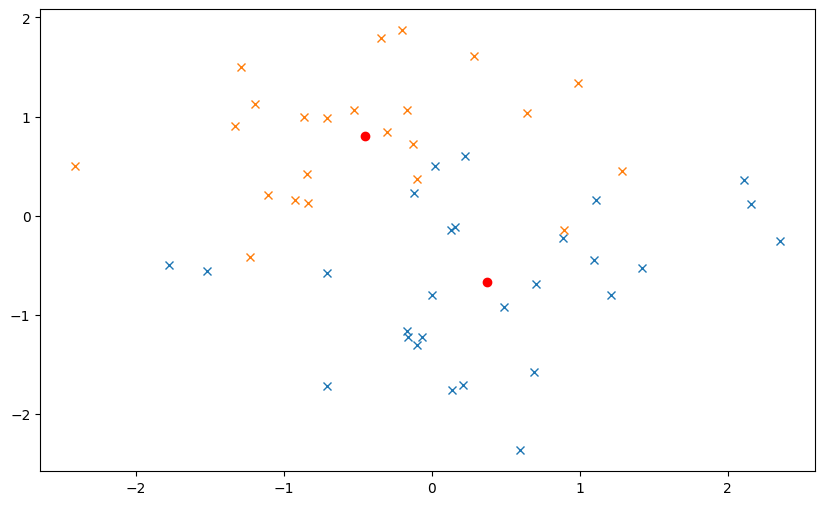

In [23]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(scaled_x)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10,6))
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'ro', label='Cluster Centers')


y = kmeans.labels_
for c in range(n_clusters):
    plt.plot(scaled_x[y==c,0], scaled_x[y==c,1], 'x')

plt.show()

In [24]:
# print out feature means for the clusters
print("Cluster 0 means", np.mean(scaler.inverse_transform(scaled_x[kmeans.labels_ == 0]),axis=0))
print("Cluster 1 means", np.mean(scaler.inverse_transform(scaled_x[kmeans.labels_ == 1]),axis=0))

Cluster 0 means [3129.21428571  153.57142857  174.85714286   79.21428571]
Cluster 1 means [2660.39130435  244.95652174  159.34782609   69.2173913 ]


In [32]:
class_0_std = np.std(data[y == 0, :-1], axis=0)
class_1_std = np.std(data[y == 1, :-1], axis=0)
class_0_means = np.mean(data[y == 0, :-1], axis=0)
class_1_means = np.mean(data[y == 1, :-1], axis=0)

class_0_std,class_1_std,class_0_means,class_1_means

(array([557.87316033,  39.1503701 ,   7.5780944 ,  14.67618931]),
 array([555.32039905,  44.69534204,   6.78987481,  12.97690256]),
 array([2799.19230769,  239.69230769,  160.26923077,   70.38461538]),
 array([3041.12,  148.08,  175.76,   79.2 ]))

In [33]:
import pandas as pd

feature_names = ['Salary', 'Housecare time', 'Height', 'Weight']

comparison_df = pd.DataFrame({
    'Feature': feature_names,
    'Cluster 1 Mean': cluster_centers[0],
    'Cluster 2 Mean': cluster_centers[1],
    'Class 0 Mean (Female)': class_0_means,
    'Class 1 Mean (Male)': class_1_means
})

print(comparison_df)


          Feature  Cluster 1 Mean  Cluster 2 Mean  Class 0 Mean (Female)  \
0          Salary     3129.214286     2660.391304            2799.192308   
1  Housecare time      153.571429      244.956522             239.692308   
2          Height      174.857143      159.347826             160.269231   
3          Weight       79.214286       69.217391              70.384615   

   Class 1 Mean (Male)  
0              3041.12  
1               148.08  
2               175.76  
3                79.20  


#### Step 4: GMM (2p)

Perform soft (Gaussian) clustering of the data. Compare the per class cluster means with means from sample data.

In [11]:
# gmm = ...
# print("Cluster means", ...)
n_components=2
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(scaled_x)
labels = gmm.predict(scaled_x)
print("Cluster 0 means:", scaled_x[labels == 0].mean(axis=0))
print("Cluster 1 means:", scaled_x[labels == 1].mean(axis=0))


Cluster 0 means: [ 0.33838742 -0.58845739  0.64651054  0.21719821]
Cluster 1 means: [-0.4834106   0.84065341 -0.92358648 -0.31028316]


In [19]:
gmm_cluster_0_means_orig = scaler.inverse_transform(np.mean(scaled_x[labels == 0], axis=0).reshape(1, -1))
gmm_cluster_1_means_orig = scaler.inverse_transform(np.mean(scaled_x[labels == 1], axis=0).reshape(1, -1))

print("GMM Cluster 0 means (original scale):", gmm_cluster_0_means_orig[0])
print("GMM Cluster 1 means (original scale):", gmm_cluster_1_means_orig[0])

GMM Cluster 0 means (original scale): [3110.53333333  158.23333333  174.7          77.86666667]
GMM Cluster 1 means (original scale): [2642.42857143  247.          158.0952381    70.19047619]


#### Step 5: Looking at the results (3p)

Please answer in the cell below.

1. What is the purpose of scaler.inverse_transform() call? Could you avoid it?
2. Which set of mean values represents cluster of females? Does it match the label (0 / 1)? Should it match? Why / why not?
3. Compare the statistics (means, stds etc) from clustered data with those calculated from real sample classes. Any noticable differences?

1. scaler.invers_transform() is used to inverse the scaling applied to the data and bringing it back to the original scale. in this case the results and predictions are easier to interpret. If avoid it like what happend in step4 cell, the output are not readable and interpretable.

2. Cluster 2 represents females (label 0), and Cluster 1 represents males (label 1). In my mind it should not match in general, because in this special example we have 2 clusters and in other datasets if we have more than 2 clusters this could interpret better.

   3.There is just a little difference between Salaries and Housecare time in Cluster means and Class means, but not noticable .